In [1]:
pip install fastdtw

     ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
     ----- ------------------------------- 20.5/133.4 kB 330.3 kB/s eta 0:00:01
     ------------------- ----------------- 71.7/133.4 kB 787.7 kB/s eta 0:00:01
     -------------------------------------- 133.4/133.4 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3586 sha256=bdb1728989b88bc03714e447a818c4dbe7a56cab5ee25a3bed3c26683e3c85c8
  Stored in directory: c:\users\katgm\appdata\local\pip\cache\wheels\ab\d0\26\b82cb0f49ae73e5e6bba4e

In [2]:
pip install dtw-python

   ---------------------------------------- 0.0/355.4 kB ? eta -:--:--
   -- ------------------------------------ 20.5/355.4 kB 640.0 kB/s eta 0:00:01
   ---- ---------------------------------- 41.0/355.4 kB 653.6 kB/s eta 0:00:01
   ----------------- ---------------------- 153.6/355.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 355.4/355.4 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
pip install tslearn

   ---------------------------------------- 0.0/374.4 kB ? eta -:--:--
   --- ------------------------------------ 30.7/374.4 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 153.6/374.4 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 374.4/374.4 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------ --------------------------------- 0.5/2.7 MB 14.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.7/2.7 MB 9.5 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.7 MB 12.0 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.7 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 13.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
    --------------------------------------- 0.7/28.1 MB 21.5 MB/s eta 0:00:02
   - -------------------------------------- 1.3/28.1 MB 16.0 MB/s eta 0:00:02
   -- -----

In [4]:
pip install dtaidistance

     ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.0 MB 653.6 kB/s eta 0:00:14
      --------------------------------------- 0.1/9.0 MB 1.2 MB/s eta 0:00:08
     - -------------------------------------- 0.4/9.0 MB 2.9 MB/s eta 0:00:04
     --- ------------------------------------ 0.8/9.0 MB 4.8 MB/s eta 0:00:02
     ----- ---------------------------------- 1.2/9.0 MB 5.8 MB/s eta 0:00:02
     -------- ------------------------------- 1.8/9.0 MB 7.3 MB/s eta 0:00:01
     ----------- ---------------------------- 2.5/9.0 MB 8.3 MB/s eta 0:00:01
     ------------- -------------------------- 3.0/9.0 MB 9.1 MB/s eta 0:00:01
     --------------- ------------------------ 3.5/9.0 MB 9.7 MB/s eta 0:00:01
     ----------------- ---------------------- 4.0/9.0 MB 9.9 MB/s eta 0:00:01
     -------------------- ------------------- 4.5/9.0 MB 10.3 MB/s eta 0:00:

In [38]:
import padasip as pa
import pandas as pd
import numpy as np
import os
import padasip as pa
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from dtaidistance import dtw
import warnings
warnings.filterwarnings('ignore')

In [47]:
#RUNNING IN JUPYTER
os.chdir("C:\\Users\\rarsi\\Rutgers University\\Michelle Chen - COVID_Fatigue\\RC_award\\Data\\Test_Data\\FinalData")
#os.chdir("C:\\Users\\katgm\\Rutgers University\\Michelle Chen - Rutgers_Neuropsych_Lab\\COVID_Fatigue\\RC_award\\Data\\Test_Data\\FinalData")


In [48]:
def normalize_array(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    normalized_arr = (arr - min_val) / (max_val - min_val)
    return normalized_arr

In [49]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    mean = np.mean([data1, data2], axis=0)
    diff = data1 - data2                   # Difference between data1 and data2
    md = np.mean(diff)                     # Mean of the difference
    sd = np.std(diff, axis=0)              # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md, color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.title('Bland-Altman Plot')
    plt.xlabel('Average of Two Measurements')
    plt.ylabel('Difference Between Two Measurements')
    plt.show()

In [50]:
def dtw_distance(series1, series2, dist_func=lambda x, y: abs(x - y)):
    """
    Calculate the Dynamic Time Warping distance between two time series.
    
    Args:
    - series1: List or array of values for the first time series.
    - series2: List or array of values for the second time series.
    - dist_func: Function used to calculate the distance between two points (default is absolute difference).
    
    Returns:
    - float, representing the DTW distance between the two series.
    """
    n, m = len(series1), len(series2)
    dtw_matrix = np.zeros((n+1, m+1))
    
    # Initialize the first row and column to infinity
    dtw_matrix[0, :] = np.inf
    dtw_matrix[:, 0] = np.inf
    dtw_matrix[0, 0] = 0
    
    # Populate the DTW matrix
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = dist_func(series1[i-1], series2[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # Insertion
                                          dtw_matrix[i, j-1],    # Deletion
                                          dtw_matrix[i-1, j-1])  # Match
    
    return dtw_matrix[n, m], dtw_matrix

In [51]:
import numpy as np

def dtw_distance_windowed(series1, series2, window_size, dist_func=lambda x, y: abs(x - y)):
    """
    Compute DTW distance with a window constraint to reduce computation.

    Args:
    - series1, series2: Arrays of measurements (time series data).
    - window_size: Integer, size of the window to constrain the path.
    - dist_func: Function to compute the distance between elements from each series.
    
    Returns:
    - float, the DTW distance.
    """
    n, m = len(series1), len(series2)
    w = max(window_size, abs(n - m))  # Adjust window size to ensure it covers the length difference
    dtw_matrix = np.full((n+1, m+1), float('inf'))
    dtw_matrix[0, 0] = 0

    for i in range(1, n+1):
        for j in range(max(1, i-w), min(m+1, i+w+1)):
            cost = dist_func(series1[i-1], series2[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # insertion
                                          dtw_matrix[i, j-1],    # deletion
                                          dtw_matrix[i-1, j-1])  # match

    return dtw_matrix[n, m], dtw_matrix


In [52]:
def find_optimal_path(dtw_matrix):
    i, j = np.array(dtw_matrix.shape) - 2
    path = [(i, j)]
    while (i > 0 or j > 0):
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            direction = np.argmin([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            if direction == 0:
                i -= 1
            elif direction == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
        path.append((i, j))
    path.reverse()
    return path

In [53]:
def plot_dtw(series1, series2, path):
    plt.figure(figsize=(10, 5))
    plt.plot(series1, label='Series 1')
    plt.plot(series2, label='Series 2')

    # Convert path to lines for plotting
    for (map_i, map_j) in path:
        plt.plot([map_i, map_j], [series1[map_i], series2[map_j]], 'r')

    plt.title('Time Series Alignment with Dynamic Time Warping')
    plt.legend()
    plt.show()

In [54]:
#Kat's Clean signal E4
f_path = "KatE42.csv"
testE4_bvp = pd.read_csv(f_path, header=0)
testE4_bvp

,timestamp,bvp,acc_x,acc_y,acc_z,eda,temperature,Block
0,2024-05-14 19:56:16.484375,-67.57,NaN,NaN,NaN,NaN,NaN,0.0
1,2024-05-14 19:56:16.500000,-48.40,4.0,-1.0,63.0,0.107645,32.0,0.0
2,2024-05-14 19:56:16.515625,-22.57,NaN,NaN,NaN,NaN,NaN,0.0
3,2024-05-14 19:56:16.531250,9.57,4.0,-2.0,63.0,NaN,NaN,0.0
4,2024-05-14 19:56:16.546875,45.46,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
134396,2024-05-14 20:31:16.421875,6.50,NaN,NaN,NaN,NaN,NaN,6.0
134397,2024-05-14 20:31:16.437500,3.28,38.0,9.0,50.0,NaN,NaN,6.0
134398,2024-05-14 20:31:16.453125,-0.34,NaN,NaN,NaN,NaN,NaN,6.0
134399,2024-05-14 20:31:16.468750,-3.99,38.0,9.0,50.0,NaN,NaN,6.0


In [55]:
#Kat's Clean signal EmP
f_path = "KatEmP2.csv"
testEmP_bvp = pd.read_csv(f_path, header=0)
testEmP_bvp

,timestamp,bvp,acc_x,acc_y,acc_z,eda,temperature,Block
0,2024-05-14 19:56:16.484375,0.052596,0.012207,-0.467773,0.884766,NaN,NaN,0.0
1,2024-05-14 19:56:16.500000,0.049834,-0.042969,-0.480957,0.910156,NaN,NaN,0.0
2,2024-05-14 19:56:16.515625,0.045382,-0.097168,-0.502441,0.927246,NaN,NaN,0.0
3,2024-05-14 19:56:16.531250,0.039271,-0.107422,-0.483887,0.941406,NaN,NaN,0.0
4,2024-05-14 19:56:16.546875,0.031721,-0.068359,-0.474609,0.929688,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
134396,2024-05-14 20:31:16.421875,-0.040273,-0.068848,0.208008,0.972656,NaN,NaN,6.0
134397,2024-05-14 20:31:16.437500,-0.034349,-0.065918,0.210938,0.979492,NaN,NaN,6.0
134398,2024-05-14 20:31:16.453125,-0.027695,-0.069824,0.212402,0.979004,NaN,NaN,6.0
134399,2024-05-14 20:31:16.468750,-0.020888,-0.068848,0.216309,0.978027,NaN,NaN,6.0


In [15]:
# # just do one file at a time for the additional participants
# final_E4_bvp = pd.DataFrame()

# blocks = [0,1,2,3,4,5,6]
# for block in blocks:
#   bl = testE4_bvp[testE4_bvp['Block']== block]
#   test_bvp0 = test_bvp.iloc[:len(bl)]
#   n = 10
#   #dd = bl['BVP_filtered'].values #noisy signal
#   xx = testE4_bvp['bvp'].values #clean signal
#   x = pa.input_from_history(xx, n)
#   f = pa.filters.FilterNLMS(n=n, mu=0.04, w="random")
#   y, e, w = f.run(dd[:len(x)], x)
#   df = pd.DataFrame(y, columns = ['padasip_BVP_signal'])
#   bl = bl.iloc[:len(df)]
#   bl['padasip'] = df.iloc[:,0].values
#   final = pd.concat([final, bl], ignore_index=True)
# #final.to_csv(SubjID + "_lab_filtered_cleaned.csv")
# final

In [57]:
# #grouping by block
# def windows_by_block(df):
#   df["block_index"] = df.groupby(["Block"]).cumcount()+1

#   df["window_num_60"] = (df["block_index"]/3840).astype(int)
#   df['window_num_60str'] = df['Block'].astype(str) + "." + df['window_num_60'].astype(str)

#   df["window_num_30"] = (df["block_index"]/1920).astype(int)
#   df['window_num_30str'] = df['Block'].astype(str) + "." + df['window_num_30'].astype(str)

#   df["window_num_10"] = (df["block_index"]/640).astype(int)
#   df['window_num_10str'] = df['Block'].astype(str) + "." + df['window_num_10'].astype(str)

#   return df

In [61]:
#findpeaks in scipy
#can add optional parameters to the find_peaks function to adjust for minimum height, distance and threshhold
#distance here is defined as 26, which comes out to roughly 0.4s as in Campanella_2023
from scipy.signal import find_peaks
def scipy_peaks(df):
  peaks = find_peaks(df["bvp"], height=0, distance=26)
  peaks_series = pd.Series(peaks[0])
  df["Peaks"] = 0
  df.loc[peaks_series, "Peaks"] = 1

  return df

In [64]:
testE4_peaks = scipy_peaks(testE4_bvp)
testEmP_peaks = scipy_peaks(testEmP_bvp)
testE4_peaks

,timestamp,bvp,acc_x,acc_y,acc_z,eda,temperature,Block,Peaks
0,2024-05-14 19:56:16.484375,-67.57,NaN,NaN,NaN,NaN,NaN,0.0,0
1,2024-05-14 19:56:16.500000,-48.40,4.0,-1.0,63.0,0.107645,32.0,0.0,0
2,2024-05-14 19:56:16.515625,-22.57,NaN,NaN,NaN,NaN,NaN,0.0,0
3,2024-05-14 19:56:16.531250,9.57,4.0,-2.0,63.0,NaN,NaN,0.0,0
4,2024-05-14 19:56:16.546875,45.46,NaN,NaN,NaN,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...
134396,2024-05-14 20:31:16.421875,6.50,NaN,NaN,NaN,NaN,NaN,6.0,0
134397,2024-05-14 20:31:16.437500,3.28,38.0,9.0,50.0,NaN,NaN,6.0,0
134398,2024-05-14 20:31:16.453125,-0.34,NaN,NaN,NaN,NaN,NaN,6.0,0
134399,2024-05-14 20:31:16.468750,-3.99,38.0,9.0,50.0,NaN,NaN,6.0,0


Shape of bvp_data_1: (134401,)
Shape of bvp_data_2: (134401,)
Pearson correlation coefficient: 0.0037888263091215525
Manhattan Distance (L1 norm): 6111.0
Euclidean Distance (L2 norm): 78.1728853247723
Euclidean Distance using np.linalg.norm: 78.1728853247723
DTW Distance on Downsampled Data: (159.30700198565387, array([[0.00000000e+00,            inf,            inf, ...,
                   inf,            inf,            inf],
       [           inf, 1.40819328e-02, 3.05790643e-02, ...,
        5.05811176e+02, 5.05917940e+02, 5.05932866e+02],
       [           inf, 2.07221550e-02, 5.13012193e-02, ...,
        4.99522121e+02, 4.99608163e+02, 4.99643811e+02],
       ...,
       [           inf, 4.92662402e+02, 4.92669244e+02, ...,
        1.59282405e+02, 1.59329919e+02, 1.59380748e+02],
       [           inf, 4.92732998e+02, 4.92763577e+02, ...,
        1.59354108e+02, 1.59304491e+02, 1.59404095e+02],
       [           inf, 4.92759496e+02, 4.92737079e+02, ...,
        1.59363770e+02,

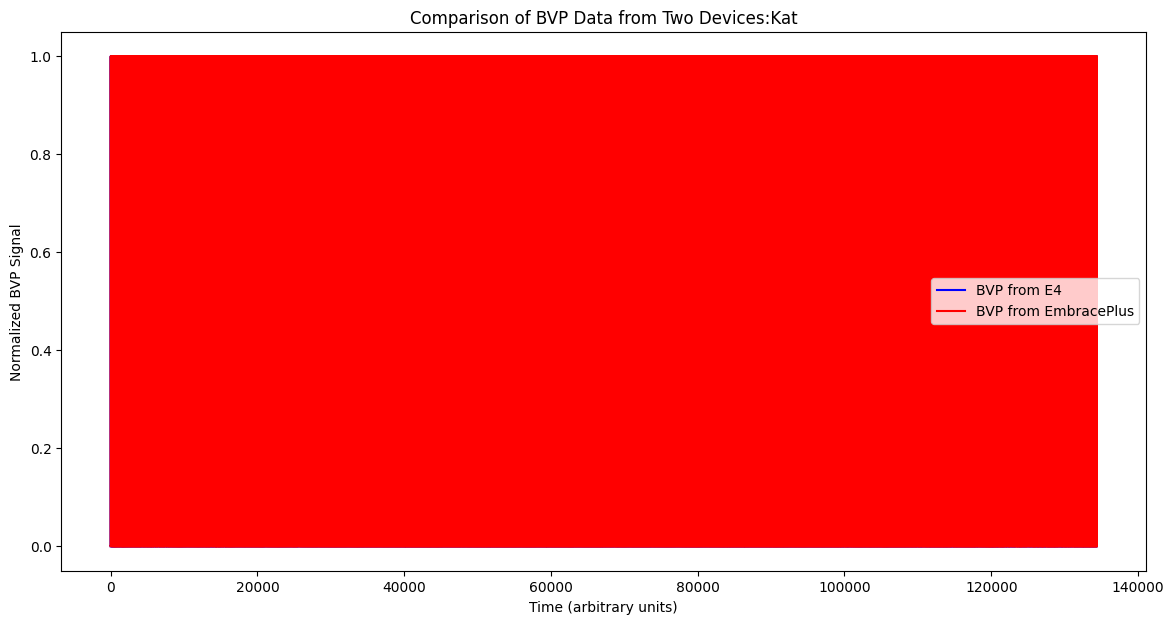

In [65]:
#from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.signal import resample


bvp_data_1 = testE4_peaks['Peaks'].values  # Replace 'BVP' with the actual column name
bvp_data_2 = testEmP_peaks['Peaks'].values  # Replace 'BVP' with the actual column name

# Drop any rows where either BVP reading is NaN
#bvp_data_2 = bvp_data_2[~np.isnan(bvp_data_2)]
# Drop the last two rows
#bvp_data_2 = bvp_data_2[:-2]

bvp_data_1=normalize_array(bvp_data_1)
bvp_data_2=normalize_array(bvp_data_2)

# # Ensure both arrays are indeed 1-D
# bvp_data_1 = np.ravel(bvp_data_1)
# bvp_data_2 = np.ravel(bvp_data_2)

# Print the shapes to inspect them
print("Shape of bvp_data_1:", bvp_data_1.shape)
print("Shape of bvp_data_2:", bvp_data_2.shape)

# # Dynamic Time Warping
# # distance, path = fastdtw(bvp_data_1, bvp_data_2, dist=euclidean)
# d = dtw.distance(bvp_data_1, bvp_data_2)
# print("DTW distance:", distance)


# Pearson Correlation Coefficient
correlation = np.corrcoef(bvp_data_1, bvp_data_2)[0, 1]
print("Pearson correlation coefficient:", correlation)

# L1 Norm - Manhattan Distance
manhattan_distance = np.sum(np.abs(bvp_data_1 - bvp_data_2))
print("Manhattan Distance (L1 norm):", manhattan_distance)

# L2 Norm - Euclidean Distance
euclidean_distance = np.sqrt(np.sum((bvp_data_1 - bvp_data_2) ** 2))
print("Euclidean Distance (L2 norm):", euclidean_distance)

# Alternatively, using NumPy's built-in functions
euclidean_distance_np = np.linalg.norm(bvp_data_1 - bvp_data_2)
print("Euclidean Distance using np.linalg.norm:", euclidean_distance_np)

# Downsample the series
series1_downsampled = resample(bvp_data_1, int(len(bvp_data_1)/10))
series2_downsampled = resample(bvp_data_2, int(len(bvp_data_2)/10))

# Compute DTW on the downsampled data
distance = dtw_distance(series1_downsampled, series2_downsampled)
print("DTW Distance on Downsampled Data:", distance)
# # Define window size
# window_size = 10  # Only allow alignment within this many steps
# # Compute DTW with window constraint
# dtw_distance = dtw_distance_windowed(bvp_data_1, bvp_data_2, window_size)
# print(f"Constrained DTW Distance: {dtw_distance}")

# distance = dtw_distance(bvp_data_1, bvp_data_2)
# print(f"DTW Distance: {distance}")

# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(bvp_data_1, label='BVP from E4', color='blue')
plt.plot(bvp_data_2, label='BVP from EmbracePlus', color='red')
plt.title('Comparison of BVP Data from Two Devices:Kat')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Normalized BVP Signal')
plt.legend()
plt.show()

DTW Distance on Downsampled Data: 159.30700198565387


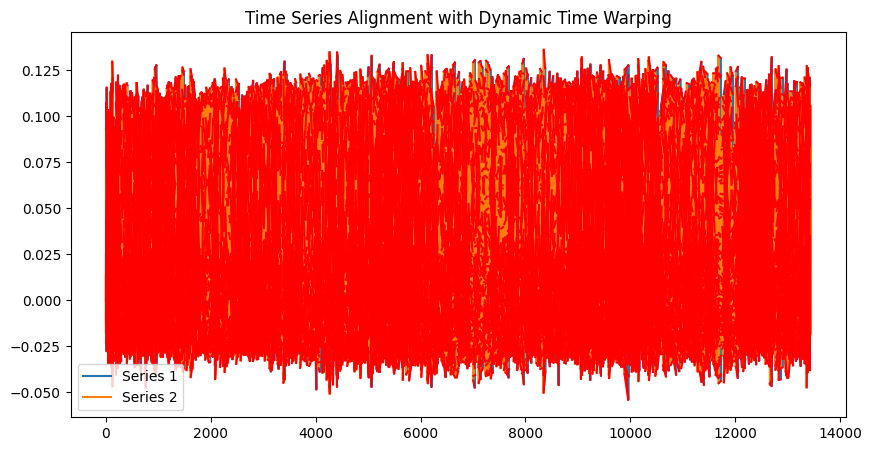

In [66]:
# Compute DTW on the downsampled data
distance, dtw_matrix = dtw_distance(series1_downsampled, series2_downsampled)
print("DTW Distance on Downsampled Data:", distance)
# distance = dtw_distance_windowed_with_matrix(series1, series2, 10)
path = find_optimal_path(dtw_matrix)
plot_dtw(series1_downsampled, series2_downsampled, path)

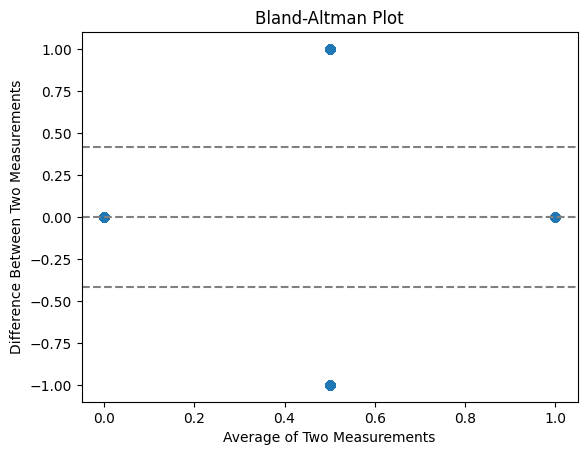

In [67]:
bland_altman_plot(bvp_data_1, bvp_data_2)

Shape of bvp_data_1: (134401,)
Shape of bvp_data_2: (134401,)
Pearson correlation coefficient: -0.049381317814918974
Manhattan Distance (L1 norm): 12113.584033872641
Euclidean Distance (L2 norm): 41.044490280499424
Euclidean Distance using np.linalg.norm: 41.04449028049942
DTW Distance on Downsampled Data: (795.3284300761712, array([[0.00000000e+00,            inf,            inf, ...,
                   inf,            inf,            inf],
       [           inf, 1.03039532e-01, 1.84108278e-01, ...,
        1.20254511e+03, 1.20271509e+03, 1.20274567e+03],
       [           inf, 2.90908261e-01, 3.12879048e-01, ...,
        1.20261377e+03, 1.20266604e+03, 1.20298753e+03],
       ...,
       [           inf, 1.22411318e+03, 9.42293766e+02, ...,
        7.95254219e+02, 7.95432228e+02, 7.95284264e+02],
       [           inf, 1.22416233e+03, 9.42320951e+02, ...,
        7.95156022e+02, 7.95272117e+02, 7.95356583e+02],
       [           inf, 1.22423964e+03, 9.42376290e+02, ...,
        7

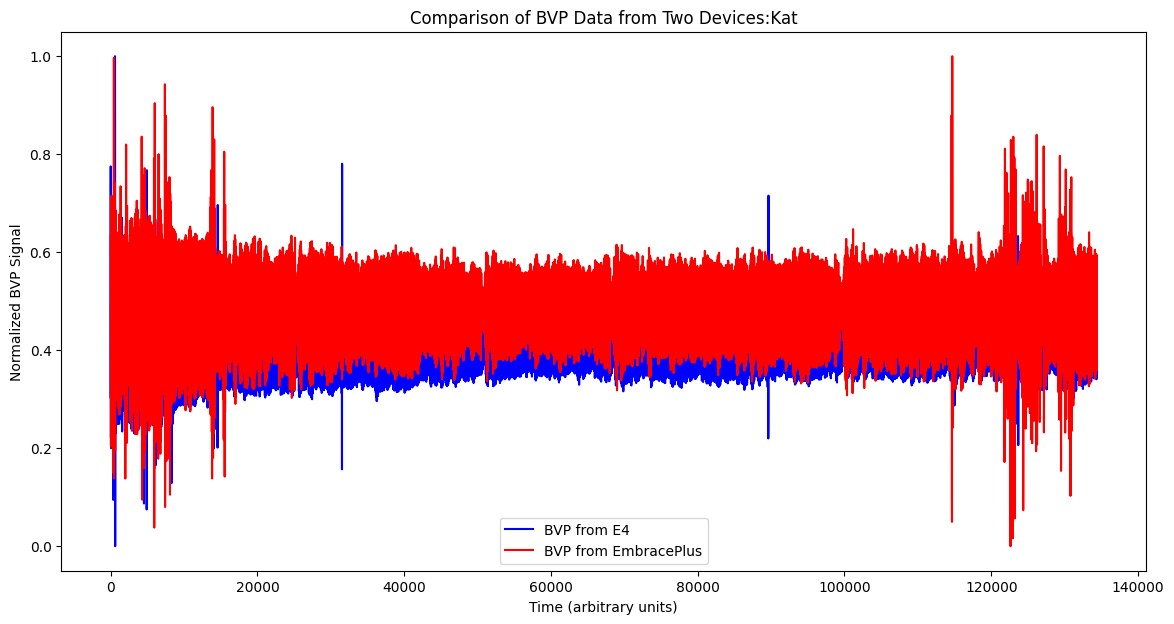

In [68]:
#from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.signal import resample


bvp_data_1 = testE4_peaks['bvp'].values  # Replace 'BVP' with the actual column name
bvp_data_2 = testEmP_peaks['bvp'].values  # Replace 'BVP' with the actual column name

# Drop any rows where either BVP reading is NaN
#bvp_data_2 = bvp_data_2[~np.isnan(bvp_data_2)]
# Drop the last two rows
#bvp_data_2 = bvp_data_2[:-2]

bvp_data_1=normalize_array(bvp_data_1)
bvp_data_2=normalize_array(bvp_data_2)

# # Ensure both arrays are indeed 1-D
# bvp_data_1 = np.ravel(bvp_data_1)
# bvp_data_2 = np.ravel(bvp_data_2)

# Print the shapes to inspect them
print("Shape of bvp_data_1:", bvp_data_1.shape)
print("Shape of bvp_data_2:", bvp_data_2.shape)

# # Dynamic Time Warping
# # distance, path = fastdtw(bvp_data_1, bvp_data_2, dist=euclidean)
# d = dtw.distance(bvp_data_1, bvp_data_2)
# print("DTW distance:", distance)


# Pearson Correlation Coefficient
correlation = np.corrcoef(bvp_data_1, bvp_data_2)[0, 1]
print("Pearson correlation coefficient:", correlation)

# L1 Norm - Manhattan Distance
manhattan_distance = np.sum(np.abs(bvp_data_1 - bvp_data_2))
print("Manhattan Distance (L1 norm):", manhattan_distance)

# L2 Norm - Euclidean Distance
euclidean_distance = np.sqrt(np.sum((bvp_data_1 - bvp_data_2) ** 2))
print("Euclidean Distance (L2 norm):", euclidean_distance)

# Alternatively, using NumPy's built-in functions
euclidean_distance_np = np.linalg.norm(bvp_data_1 - bvp_data_2)
print("Euclidean Distance using np.linalg.norm:", euclidean_distance_np)

# Downsample the series
series1_downsampled = resample(bvp_data_1, int(len(bvp_data_1)/10))
series2_downsampled = resample(bvp_data_2, int(len(bvp_data_2)/10))

# Compute DTW on the downsampled data
distance = dtw_distance(series1_downsampled, series2_downsampled)
print("DTW Distance on Downsampled Data:", distance)
# # Define window size
# window_size = 10  # Only allow alignment within this many steps
# # Compute DTW with window constraint
# dtw_distance = dtw_distance_windowed(bvp_data_1, bvp_data_2, window_size)
# print(f"Constrained DTW Distance: {dtw_distance}")

# distance = dtw_distance(bvp_data_1, bvp_data_2)
# print(f"DTW Distance: {distance}")

# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(bvp_data_1, label='BVP from E4', color='blue')
plt.plot(bvp_data_2, label='BVP from EmbracePlus', color='red')
plt.title('Comparison of BVP Data from Two Devices:Kat')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Normalized BVP Signal')
plt.legend()
plt.show()

DTW Distance on Downsampled Data: 795.3284300761712


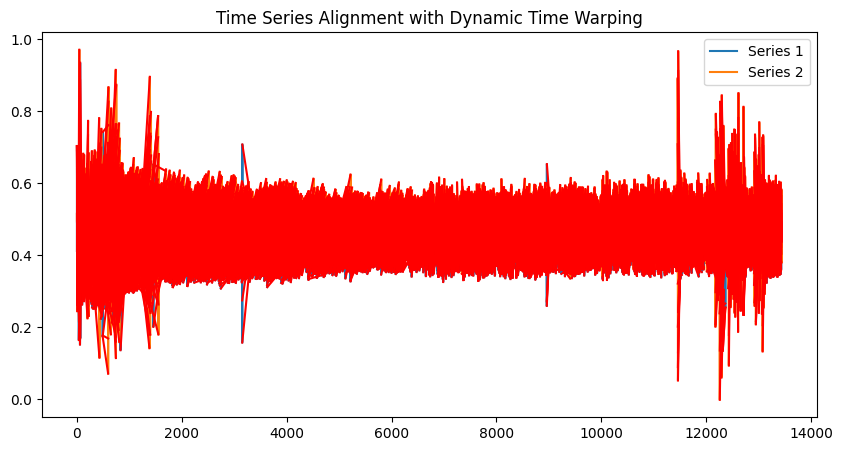

In [69]:
# Compute DTW on the downsampled data
distance, dtw_matrix = dtw_distance(series1_downsampled, series2_downsampled)
print("DTW Distance on Downsampled Data:", distance)
# distance = dtw_distance_windowed_with_matrix(series1, series2, 10)
path = find_optimal_path(dtw_matrix)
plot_dtw(series1_downsampled, series2_downsampled, path)

In [70]:
#Kat's Clean signal E4
f_path = "DarsheeE42.csv"
testE4_bvp = pd.read_csv(f_path, header=0)
testE4_bvp

,timestamp,bvp,acc_x,acc_y,acc_z,eda,temperature,Block
0,2024-05-14 18:04:50.765625,-28.09,NaN,NaN,NaN,NaN,NaN,0.0
1,2024-05-14 18:04:50.781250,-25.89,-48.0,-36.0,42.0,NaN,NaN,0.0
2,2024-05-14 18:04:50.796875,-17.83,NaN,NaN,NaN,NaN,NaN,0.0
3,2024-05-14 18:04:50.812500,0.91,9.0,-12.0,71.0,NaN,NaN,0.0
4,2024-05-14 18:04:50.828125,32.54,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
134396,2024-05-14 18:39:50.703125,-31.66,NaN,NaN,NaN,NaN,NaN,6.0
134397,2024-05-14 18:39:50.718750,-31.31,46.0,9.0,42.0,NaN,NaN,6.0
134398,2024-05-14 18:39:50.734375,-28.99,NaN,NaN,NaN,NaN,NaN,6.0
134399,2024-05-14 18:39:50.750000,-24.85,46.0,9.0,42.0,0.116615,32.89,6.0


In [71]:
#Kat's Clean signal E4
f_path = "DarsheeEmP2.csv"
testEmP_bvp = pd.read_csv(f_path, header=0)
testEmP_bvp

,timestamp,bvp,acc_x,acc_y,acc_z,eda,temperature,Block
0,2024-05-14 18:04:50.765625,0.125196,-0.035156,-0.549805,0.831055,NaN,NaN,0.0
1,2024-05-14 18:04:50.781250,0.123626,0.001465,-0.548828,0.833496,NaN,NaN,0.0
2,2024-05-14 18:04:50.796875,0.119523,-0.010254,-0.547852,0.833984,NaN,NaN,0.0
3,2024-05-14 18:04:50.812500,0.112933,-0.018066,-0.566406,0.842285,NaN,NaN,0.0
4,2024-05-14 18:04:50.828125,0.103982,-0.059570,-0.572266,0.844727,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
134390,2024-05-14 18:39:50.703125,0.004546,0.035156,0.303223,0.951660,NaN,NaN,6.0
134391,2024-05-14 18:39:50.718750,0.003232,0.036621,0.304688,0.949219,NaN,NaN,6.0
134392,2024-05-14 18:39:50.734375,0.001833,0.041016,0.296875,0.943848,NaN,NaN,6.0
134393,2024-05-14 18:39:50.750000,0.000411,0.034668,0.301270,0.948242,NaN,NaN,6.0


Shape of bvp_data_1: (134395,)
Shape of bvp_data_2: (134395,)
Pearson correlation coefficient: -0.028883037725363176
Manhattan Distance (L1 norm): 22532.236266408265
Euclidean Distance (L2 norm): 63.00652837710151
Euclidean Distance using np.linalg.norm: 63.0065283771015


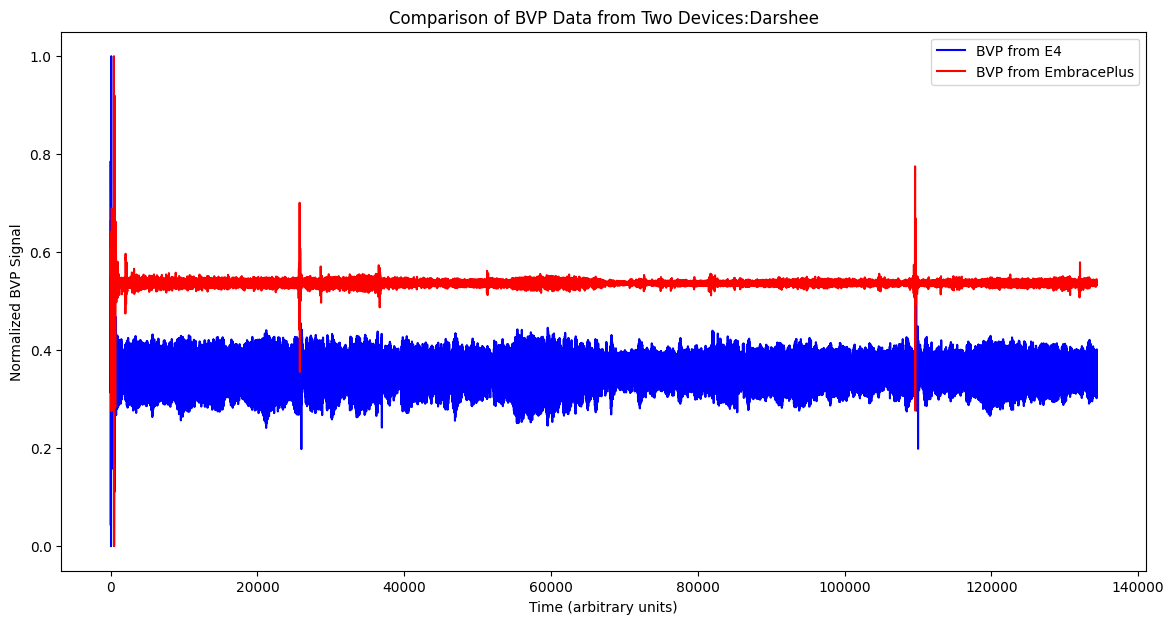

In [72]:
#from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

bvp_data_1 = testE4_bvp['bvp'].values  # Replace 'BVP' with the actual column name
bvp_data_2 = testEmP_bvp['bvp'].values  # Replace 'BVP' with the actual column name

# Drop any rows where either BVP reading is NaN
#bvp_data_2 = bvp_data_2[~np.isnan(bvp_data_2)]
#Drop the last two rows
bvp_data_1 = bvp_data_1[:-6]

bvp_data_1=normalize_array(bvp_data_1)
bvp_data_2=normalize_array(bvp_data_2)

# # Ensure both arrays are indeed 1-D
# bvp_data_1 = np.ravel(bvp_data_1)
# bvp_data_2 = np.ravel(bvp_data_2)

# Print the shapes to inspect them
print("Shape of bvp_data_1:", bvp_data_1.shape)
print("Shape of bvp_data_2:", bvp_data_2.shape)

# # Dynamic Time Warping
# distance, path = fastdtw(bvp_data_1, bvp_data_2, dist=euclidean)
# print("DTW distance:", distance)

# Pearson Correlation Coefficient
correlation = np.corrcoef(bvp_data_1, bvp_data_2)[0, 1]
print("Pearson correlation coefficient:", correlation)

# L1 Norm - Manhattan Distance
manhattan_distance = np.sum(np.abs(bvp_data_1 - bvp_data_2))
print("Manhattan Distance (L1 norm):", manhattan_distance)

# L2 Norm - Euclidean Distance
euclidean_distance = np.sqrt(np.sum((bvp_data_1 - bvp_data_2) ** 2))
print("Euclidean Distance (L2 norm):", euclidean_distance)

# Alternatively, using NumPy's built-in functions
euclidean_distance_np = np.linalg.norm(bvp_data_1 - bvp_data_2)
print("Euclidean Distance using np.linalg.norm:", euclidean_distance_np)

# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(bvp_data_1, label='BVP from E4', color='blue')
plt.plot(bvp_data_2, label='BVP from EmbracePlus', color='red')
plt.title('Comparison of BVP Data from Two Devices:Darshee')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Normalized BVP Signal')
plt.legend()
plt.show()

In [73]:
testE4_peaks = scipy_peaks(testE4_bvp)
testEmP_peaks = scipy_peaks(testEmP_bvp)
testE4_peaks

,timestamp,bvp,acc_x,acc_y,acc_z,eda,temperature,Block,Peaks
0,2024-05-14 18:04:50.765625,-28.09,NaN,NaN,NaN,NaN,NaN,0.0,0
1,2024-05-14 18:04:50.781250,-25.89,-48.0,-36.0,42.0,NaN,NaN,0.0,0
2,2024-05-14 18:04:50.796875,-17.83,NaN,NaN,NaN,NaN,NaN,0.0,0
3,2024-05-14 18:04:50.812500,0.91,9.0,-12.0,71.0,NaN,NaN,0.0,0
4,2024-05-14 18:04:50.828125,32.54,NaN,NaN,NaN,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...
134396,2024-05-14 18:39:50.703125,-31.66,NaN,NaN,NaN,NaN,NaN,6.0,0
134397,2024-05-14 18:39:50.718750,-31.31,46.0,9.0,42.0,NaN,NaN,6.0,0
134398,2024-05-14 18:39:50.734375,-28.99,NaN,NaN,NaN,NaN,NaN,6.0,0
134399,2024-05-14 18:39:50.750000,-24.85,46.0,9.0,42.0,0.116615,32.89,6.0,0


Shape of bvp_data_1: (134395,)
Shape of bvp_data_2: (134395,)
Pearson correlation coefficient: 3.336380510160758e-05
Manhattan Distance (L1 norm): 4931
Euclidean Distance (L2 norm): 70.22107945624305
Euclidean Distance using np.linalg.norm: 70.22107945624305
DTW Distance on Downsampled Data: (199.220298171129, array([[0.00000000e+00,            inf,            inf, ...,
                   inf,            inf,            inf],
       [           inf, 1.77755857e-02, 2.38811765e-02, ...,
        3.95942478e+02, 3.95947286e+02, 3.96031231e+02],
       [           inf, 1.23437157e-01, 1.11767162e-01, ...,
        3.96030364e+02, 3.96025556e+02, 3.95951226e+02],
       ...,
       [           inf, 4.46455881e+02, 4.11503417e+02, ...,
        1.99135209e+02, 1.99108133e+02, 1.99028996e+02],
       [           inf, 4.46466509e+02, 4.11504460e+02, ...,
        1.99127864e+02, 1.99120089e+02, 1.99120089e+02],
       [           inf, 4.46468021e+02, 4.11514617e+02, ...,
        1.99122845e+02, 1

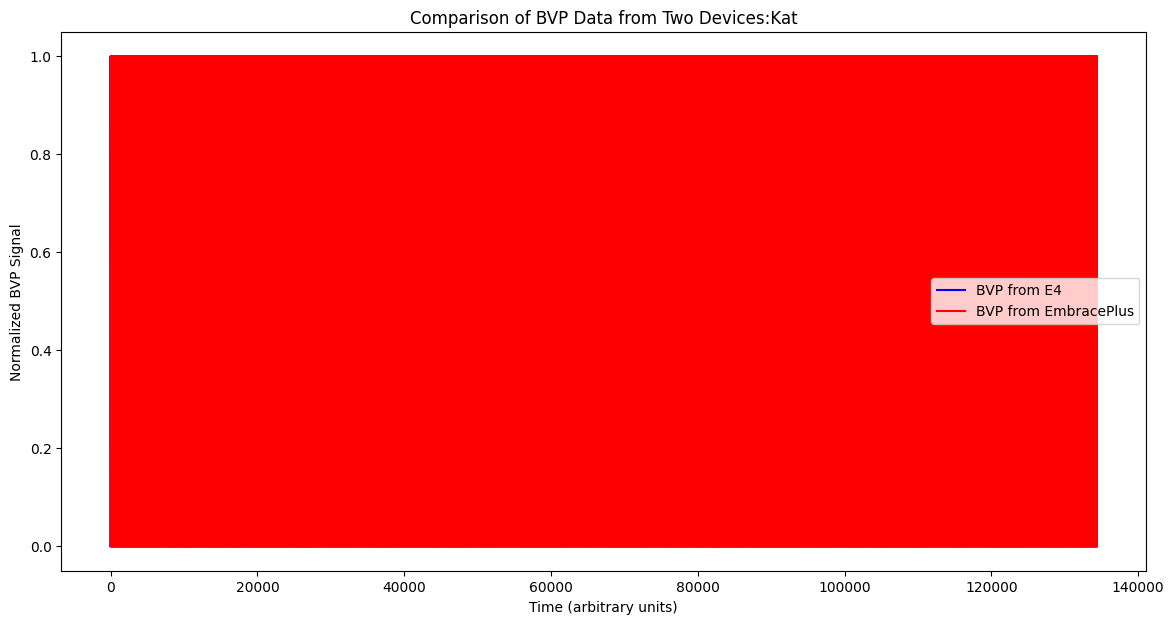

In [74]:
#from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.signal import resample


bvp_data_1 = testE4_peaks['Peaks'].values  # Replace 'BVP' with the actual column name
bvp_data_2 = testEmP_peaks['Peaks'].values  # Replace 'BVP' with the actual column name

# Drop any rows where either BVP reading is NaN
#bvp_data_2 = bvp_data_2[~np.isnan(bvp_data_2)]
# Drop the last two rows
bvp_data_1 = bvp_data_1[:-6]

# bvp_data_1=normalize_array(bvp_data_1)
# bvp_data_2=normalize_array(bvp_data_2)

# # Ensure both arrays are indeed 1-D
# bvp_data_1 = np.ravel(bvp_data_1)
# bvp_data_2 = np.ravel(bvp_data_2)

# Print the shapes to inspect them
print("Shape of bvp_data_1:", bvp_data_1.shape)
print("Shape of bvp_data_2:", bvp_data_2.shape)

# # Dynamic Time Warping
# # distance, path = fastdtw(bvp_data_1, bvp_data_2, dist=euclidean)
# d = dtw.distance(bvp_data_1, bvp_data_2)
# print("DTW distance:", distance)


# Pearson Correlation Coefficient
correlation = np.corrcoef(bvp_data_1, bvp_data_2)[0, 1]
print("Pearson correlation coefficient:", correlation)

# L1 Norm - Manhattan Distance
manhattan_distance = np.sum(np.abs(bvp_data_1 - bvp_data_2))
print("Manhattan Distance (L1 norm):", manhattan_distance)

# L2 Norm - Euclidean Distance
euclidean_distance = np.sqrt(np.sum((bvp_data_1 - bvp_data_2) ** 2))
print("Euclidean Distance (L2 norm):", euclidean_distance)

# Alternatively, using NumPy's built-in functions
euclidean_distance_np = np.linalg.norm(bvp_data_1 - bvp_data_2)
print("Euclidean Distance using np.linalg.norm:", euclidean_distance_np)

# Downsample the series
series1_downsampled = resample(bvp_data_1, int(len(bvp_data_1)/10))
series2_downsampled = resample(bvp_data_2, int(len(bvp_data_2)/10))

# Compute DTW on the downsampled data
distance = dtw_distance(series1_downsampled, series2_downsampled)
print("DTW Distance on Downsampled Data:", distance)
# # Define window size
# window_size = 10  # Only allow alignment within this many steps
# # Compute DTW with window constraint
# dtw_distance = dtw_distance_windowed(bvp_data_1, bvp_data_2, window_size)
# print(f"Constrained DTW Distance: {dtw_distance}")

# distance = dtw_distance(bvp_data_1, bvp_data_2)
# print(f"DTW Distance: {distance}")

# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(bvp_data_1, label='BVP from E4', color='blue')
plt.plot(bvp_data_2, label='BVP from EmbracePlus', color='red')
plt.title('Comparison of BVP Data from Two Devices:Kat')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Normalized BVP Signal')
plt.legend()
plt.show()

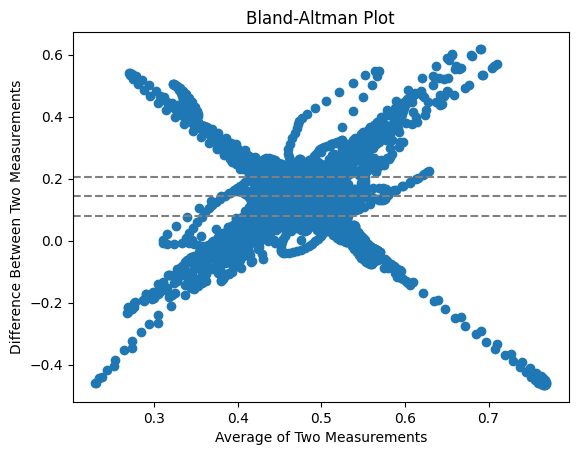

In [12]:
bland_altman_plot(bvp_data_1, bvp_data_2)

In [75]:
#Kat's Clean signal E4
f_path = "YingfeiE42.csv"
testE4_bvp = pd.read_csv(f_path, header=0)
testE4_bvp

,timestamp,bvp,acc_x,acc_y,acc_z,eda,temperature,Block
0,2024-05-20 17:24:43.468750,45.35,-37.0,7.0,55.0,NaN,NaN,0.0
1,2024-05-20 17:24:43.484375,51.07,NaN,NaN,NaN,NaN,NaN,0.0
2,2024-05-20 17:24:43.500000,55.97,-38.0,5.0,53.0,0.066637,31.69,0.0
3,2024-05-20 17:24:43.515625,59.37,NaN,NaN,NaN,NaN,NaN,0.0
4,2024-05-20 17:24:43.531250,61.43,-36.0,3.0,53.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
134396,2024-05-20 17:59:43.406250,30.28,-25.0,-59.0,-7.0,NaN,NaN,6.0
134397,2024-05-20 17:59:43.421875,20.88,NaN,NaN,NaN,NaN,NaN,6.0
134398,2024-05-20 17:59:43.437500,11.54,-25.0,-59.0,-7.0,NaN,NaN,6.0
134399,2024-05-20 17:59:43.453125,2.80,NaN,NaN,NaN,NaN,NaN,6.0


In [76]:
#Kat's Clean signal E4
f_path = "YingfeiEmP2.csv"
testEmP_bvp = pd.read_csv(f_path, header=0)
testEmP_bvp

,timestamp,bvp,acc_x,acc_y,acc_z,eda,temperature,Block
0,2024-05-20 17:24:43.468750,1.618216,0.408691,-0.053223,0.830566,NaN,NaN,0.0
1,2024-05-20 17:24:43.484375,1.647862,0.429688,-0.107422,0.859375,NaN,NaN,0.0
2,2024-05-20 17:24:43.500000,1.664268,0.324707,-0.146973,0.923340,NaN,NaN,0.0
3,2024-05-20 17:24:43.515625,1.665257,0.278809,-0.107910,0.954102,NaN,NaN,0.0
4,2024-05-20 17:24:43.531250,1.648673,0.387695,0.002441,0.961914,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
134398,2024-05-20 17:59:43.406250,-0.022930,-0.934082,0.413086,-0.012695,NaN,NaN,6.0
134399,2024-05-20 17:59:43.421875,-0.015446,-0.937012,0.403320,-0.011230,NaN,NaN,6.0
134400,2024-05-20 17:59:43.437500,-0.007769,-0.927246,0.390137,-0.014648,0.014287,NaN,6.0
134401,2024-05-20 17:59:43.453125,-0.000233,-0.934082,0.406250,-0.016602,NaN,NaN,6.0


Shape of bvp_data_1: (134401,)
Shape of bvp_data_2: (134401,)
Pearson correlation coefficient: 0.013077563514195
Manhattan Distance (L1 norm): 5645.921345741561
Euclidean Distance (L2 norm): 20.16862048823971
Euclidean Distance using np.linalg.norm: 20.16862048823971


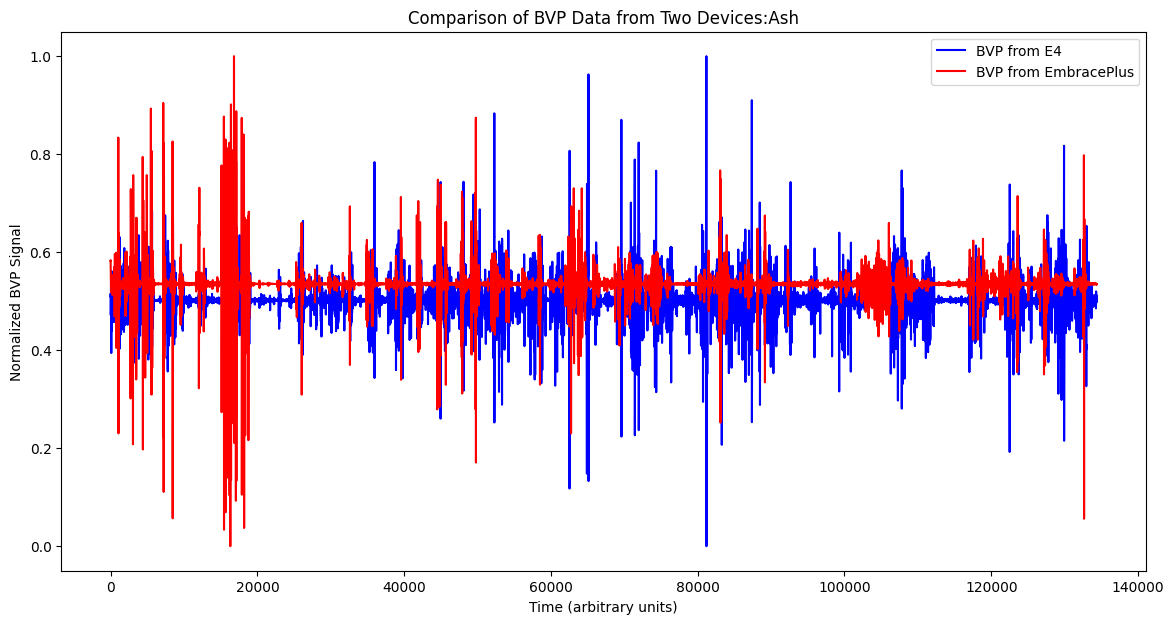

In [77]:
#from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

bvp_data_1 = testE4_bvp['bvp'].values  # Replace 'BVP' with the actual column name
bvp_data_2 = testEmP_bvp['bvp'].values  # Replace 'BVP' with the actual column name

# Drop any rows where either BVP reading is NaN
#bvp_data_2 = bvp_data_2[~np.isnan(bvp_data_2)]
#Drop the last two rows
bvp_data_2 = bvp_data_2[:-2]

bvp_data_1=normalize_array(bvp_data_1)
bvp_data_2=normalize_array(bvp_data_2)

# # Ensure both arrays are indeed 1-D
# bvp_data_1 = np.ravel(bvp_data_1)
# bvp_data_2 = np.ravel(bvp_data_2)

# Print the shapes to inspect them
print("Shape of bvp_data_1:", bvp_data_1.shape)
print("Shape of bvp_data_2:", bvp_data_2.shape)

# # Dynamic Time Warping
# distance, path = fastdtw(bvp_data_1, bvp_data_2, dist=euclidean)
# print("DTW distance:", distance)

# Pearson Correlation Coefficient
correlation = np.corrcoef(bvp_data_1, bvp_data_2)[0, 1]
print("Pearson correlation coefficient:", correlation)

# L1 Norm - Manhattan Distance
manhattan_distance = np.sum(np.abs(bvp_data_1 - bvp_data_2))
print("Manhattan Distance (L1 norm):", manhattan_distance)

# L2 Norm - Euclidean Distance
euclidean_distance = np.sqrt(np.sum((bvp_data_1 - bvp_data_2) ** 2))
print("Euclidean Distance (L2 norm):", euclidean_distance)

# Alternatively, using NumPy's built-in functions
euclidean_distance_np = np.linalg.norm(bvp_data_1 - bvp_data_2)
print("Euclidean Distance using np.linalg.norm:", euclidean_distance_np)

# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(bvp_data_1, label='BVP from E4', color='blue')
plt.plot(bvp_data_2, label='BVP from EmbracePlus', color='red')
plt.title('Comparison of BVP Data from Two Devices:Ash')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Normalized BVP Signal')
plt.legend()
plt.show()

In [78]:
testE4_peaks = scipy_peaks(testE4_bvp)
testEmP_peaks = scipy_peaks(testEmP_bvp)
testE4_peaks

,timestamp,bvp,acc_x,acc_y,acc_z,eda,temperature,Block,Peaks
0,2024-05-20 17:24:43.468750,45.35,-37.0,7.0,55.0,NaN,NaN,0.0,0
1,2024-05-20 17:24:43.484375,51.07,NaN,NaN,NaN,NaN,NaN,0.0,0
2,2024-05-20 17:24:43.500000,55.97,-38.0,5.0,53.0,0.066637,31.69,0.0,0
3,2024-05-20 17:24:43.515625,59.37,NaN,NaN,NaN,NaN,NaN,0.0,0
4,2024-05-20 17:24:43.531250,61.43,-36.0,3.0,53.0,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...
134396,2024-05-20 17:59:43.406250,30.28,-25.0,-59.0,-7.0,NaN,NaN,6.0,0
134397,2024-05-20 17:59:43.421875,20.88,NaN,NaN,NaN,NaN,NaN,6.0,0
134398,2024-05-20 17:59:43.437500,11.54,-25.0,-59.0,-7.0,NaN,NaN,6.0,0
134399,2024-05-20 17:59:43.453125,2.80,NaN,NaN,NaN,NaN,NaN,6.0,0


Shape of bvp_data_1: (134401,)
Shape of bvp_data_2: (134401,)
Pearson correlation coefficient: -0.000841921025255652
Manhattan Distance (L1 norm): 4777
Euclidean Distance (L2 norm): 69.1158447825099
Euclidean Distance using np.linalg.norm: 69.1158447825099
DTW Distance on Downsampled Data: (240.74947601723946, array([[0.00000000e+00,            inf,            inf, ...,
                   inf,            inf,            inf],
       [           inf, 7.73864135e-02, 1.17426107e-01, ...,
        3.42992835e+02, 3.42994164e+02, 3.43009624e+02],
       [           inf, 9.45041323e-02, 1.31850853e-01, ...,
        3.43087339e+02, 3.43086010e+02, 3.43104128e+02],
       ...,
       [           inf, 8.52435443e+02, 5.65555545e+02, ...,
        2.40635567e+02, 2.40638432e+02, 2.40649787e+02],
       [           inf, 8.52514020e+02, 5.65596776e+02, ...,
        2.40635912e+02, 2.40638087e+02, 2.40652356e+02],
       [           inf, 8.52532563e+02, 5.65652665e+02, ...,
        2.40733376e+02, 2

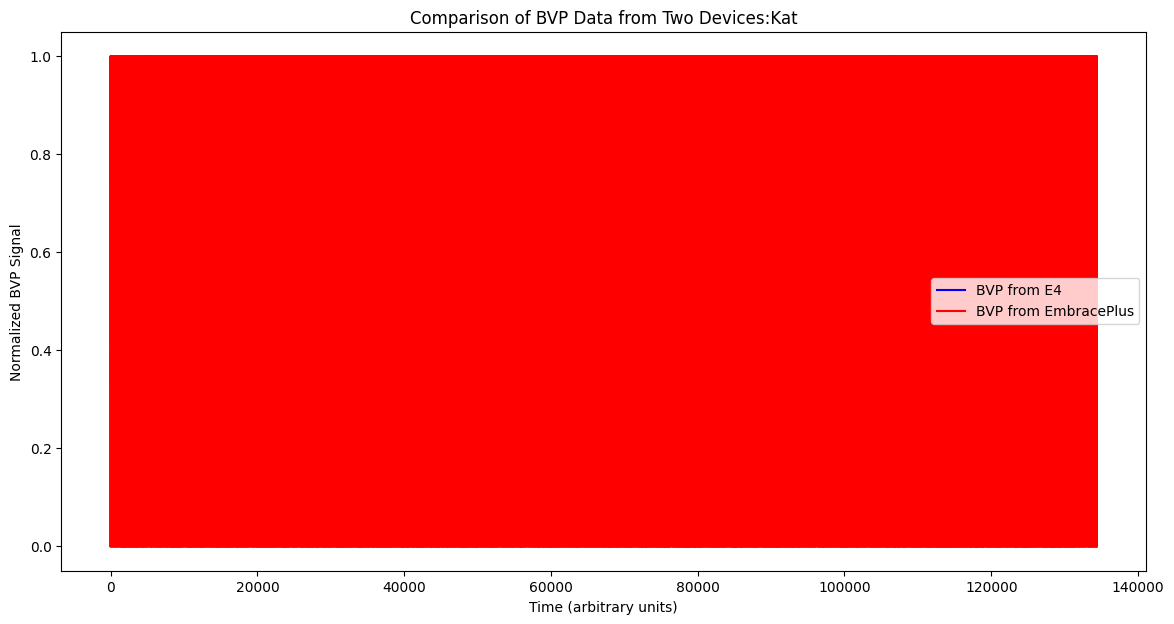

In [79]:
#from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.signal import resample


bvp_data_1 = testE4_peaks['Peaks'].values  # Replace 'BVP' with the actual column name
bvp_data_2 = testEmP_peaks['Peaks'].values  # Replace 'BVP' with the actual column name

# Drop any rows where either BVP reading is NaN
#bvp_data_2 = bvp_data_2[~np.isnan(bvp_data_2)]
#Drop the last two rows
bvp_data_2 = bvp_data_2[:-2]

# bvp_data_1=normalize_array(bvp_data_1)
# bvp_data_2=normalize_array(bvp_data_2)

# # Ensure both arrays are indeed 1-D
# bvp_data_1 = np.ravel(bvp_data_1)
# bvp_data_2 = np.ravel(bvp_data_2)

# Print the shapes to inspect them
print("Shape of bvp_data_1:", bvp_data_1.shape)
print("Shape of bvp_data_2:", bvp_data_2.shape)

# # Dynamic Time Warping
# # distance, path = fastdtw(bvp_data_1, bvp_data_2, dist=euclidean)
# d = dtw.distance(bvp_data_1, bvp_data_2)
# print("DTW distance:", distance)


# Pearson Correlation Coefficient
correlation = np.corrcoef(bvp_data_1, bvp_data_2)[0, 1]
print("Pearson correlation coefficient:", correlation)

# L1 Norm - Manhattan Distance
manhattan_distance = np.sum(np.abs(bvp_data_1 - bvp_data_2))
print("Manhattan Distance (L1 norm):", manhattan_distance)

# L2 Norm - Euclidean Distance
euclidean_distance = np.sqrt(np.sum((bvp_data_1 - bvp_data_2) ** 2))
print("Euclidean Distance (L2 norm):", euclidean_distance)

# Alternatively, using NumPy's built-in functions
euclidean_distance_np = np.linalg.norm(bvp_data_1 - bvp_data_2)
print("Euclidean Distance using np.linalg.norm:", euclidean_distance_np)

# Downsample the series
series1_downsampled = resample(bvp_data_1, int(len(bvp_data_1)/10))
series2_downsampled = resample(bvp_data_2, int(len(bvp_data_2)/10))

# Compute DTW on the downsampled data
distance = dtw_distance(series1_downsampled, series2_downsampled)
print("DTW Distance on Downsampled Data:", distance)
# # Define window size
# window_size = 10  # Only allow alignment within this many steps
# # Compute DTW with window constraint
# dtw_distance = dtw_distance_windowed(bvp_data_1, bvp_data_2, window_size)
# print(f"Constrained DTW Distance: {dtw_distance}")

# distance = dtw_distance(bvp_data_1, bvp_data_2)
# print(f"DTW Distance: {distance}")

# Plotting the time series
plt.figure(figsize=(14, 7))
plt.plot(bvp_data_1, label='BVP from E4', color='blue')
plt.plot(bvp_data_2, label='BVP from EmbracePlus', color='red')
plt.title('Comparison of BVP Data from Two Devices:Kat')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Normalized BVP Signal')
plt.legend()
plt.show()

In [58]:
# from tslearn.metrics import dtw
# # Compute DTW distance using tslearn
# distance = dtw(bvp_data_1, bvp_data_2)

# print("DTW distance between the two time series:", distance)

MemoryError: Unable to allocate 162. GiB for an array with shape (147547, 147547) and data type float64

In [56]:

# ## Find the best match with the canonical recursion formula
# from dtw import *
# alignment = dtw(bvp_data_1, bvp_data_2, keep_internals=True)

# ## Display the warping curve, i.e. the alignment curve
# alignment.plot(type="threeway")

MemoryError: Unable to allocate 162. GiB for an array with shape (147547, 147547) and data type float64